In [1]:
%matplotlib inline

# Payload size

In [2]:
from prio import prio

def generate_encrypted_sizes():
    _, pubkey = prio.create_keypair()

    def size(n):
        cfg = prio.Config(n, pubkey, pubkey, b"test")
        a, b = prio.Client(cfg).encode(bytes([1]*k))
        return [k, len(a), len(b)]

    out = []
    for k in range(0, 10000, 10):
        try:
            out.append(size(k))
        except:
            print(f"Prio excepted at {k} items")
            break
    return out

sizes = generate_encrypted_sizes()

Prio excepted at 2050 items


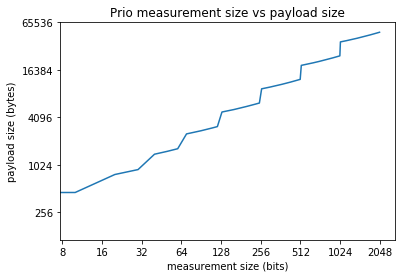

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.title('Prio measurement size vs payload size')
plt.xlabel('measurement size (bits)')
plt.ylabel('payload size (bytes)')
plt.plot(*np.array(sizes).T[:2])

# Client encoding time

In [4]:
import timeit

runs = 10**3
timings = []
for k in [8, 16, 32, 64, 128, 256, 512, 1024, 2047]:
    _, pubkey = prio.create_keypair()
    cfg = prio.Config(k, pubkey, pubkey, b"test_batch")
    client = prio.Client(cfg)
    data = bytes([1]*k)
    timing = timeit.timeit('client.encode(data)', number=runs, globals=globals())
    timings.append([k, timing])

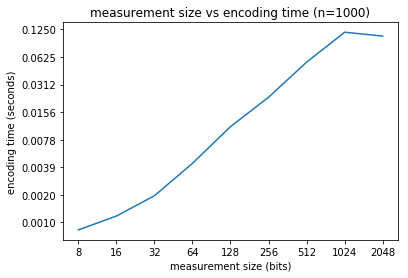

In [5]:
data = np.array(timings)
y = data[:, 1]/runs
x = data[:, 0]

fig, ax = plt.subplots()
plt.title(f"measurement size vs encoding time (n={runs})")
plt.xlabel("measurement size (bits)")
plt.ylabel("encoding time (seconds)")
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.plot(x, y)